Hate Crime DataFrame by County
=========
---------------
Create a Dataframe including following columns:
* FIPS Code
* County Name
* State
* Population
* Number of hate crimes (Race/Ethnicity/Religion) for the following years:
    * 2012
    * 2013
    * 2014
    * 2015
    * 2016
* Hate Crime Rate (Race/Ethnicity/Religion) per 10,000 population for the following years:
    * 2012
    * 2013
    * 2014
    * 2015
    * 2016
* Total Hate Crimes (Race/Ethnicity/Religion) commited from 2012 to 2016
* 2012-2016 Combined Hate Crime Rate (Race/Ethnicity/Religion) per 10,000 population from 2012 to 2016
* 2012-2016 Average Hate Crime Rate (Race/Ethnicity/Religion) per 10,000 population from 2012 to 2016

## Import Libraries and configuration files


In [9]:
#Import libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import plotly.offline as py
#For this library it was required to install plotly and geopandas via Conda, also update setuptools and install ez_setup
import plotly.figure_factory as ff  
import vincent
#from geopy.geocoders import Nominatim

#Configuration files
from config import gkey
py.offline.init_notebook_mode(connected=True)
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10



## Hate Crime Dataframes by agency name, by year (2012-2016) 

In [2]:
#FILES CONTAINING DATA REQUIRED FOR ANALYSIS
#Hate Crime Data from https://ucr.fbi.gov from 2012 to 2016
csv_crime_2012 = "../Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2012.csv"
csv_crime_2013 = "../Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2013.csv"
csv_crime_2014 = "../Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2014.csv"
csv_crime_2015 = "../Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2015.csv"
csv_crime_2016 = "../Resources/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2016.csv"
#CSV with U.S. States name and code
csv_states = "../Resources/states.csv"
#U.S. States Population estimates by state based on Census 2010
csv_population = "../Resources/population_estimates.csv"

#Dataframes created from CSV files
states_df = pd.read_csv(csv_states)
population_df = pd.read_csv(csv_population)
hate_crime_2012 = pd.read_csv(csv_crime_2012)
hate_crime_2013 = pd.read_csv(csv_crime_2013)
hate_crime_2014 = pd.read_csv(csv_crime_2014)
hate_crime_2015 = pd.read_csv(csv_crime_2015)
hate_crime_2016 = pd.read_csv(csv_crime_2016)

#Columns created to sum hate crimes related with Race/Ethnicity/Religion (hate crimes related with immigration)
hate_crime_2012['2012 Crimes'] = hate_crime_2012['Race'] + hate_crime_2012['Ethnicity'] + hate_crime_2012['Religion']
hate_crime_2013['2013 Crimes'] = hate_crime_2013['Race'] + hate_crime_2013['Ethnicity'] + hate_crime_2013['Religion']
hate_crime_2014['2014 Crimes'] = hate_crime_2014['Race'] + hate_crime_2014['Ethnicity'] + hate_crime_2014['Religion']
hate_crime_2015 = hate_crime_2015.rename(columns={'Race/\nEthnicity/\nAncestry': '2015 Crimes'})
hate_crime_2016 = hate_crime_2016.rename(columns={'Race/\nEthnicity/\nAncestry': '2016 Crimes'})
hate_crime_2015['2015 Crimes'] = hate_crime_2015['2015 Crimes'] + hate_crime_2015['Religion']
hate_crime_2016['2016 Crimes'] = hate_crime_2016['2016 Crimes'] + hate_crime_2016['Religion']

#Dataframes edited to contain only relevant columns
hate_crime_2012 = hate_crime_2012[["State", "Agency name", "2012 Crimes", "Population"]]
hate_crime_2013 = hate_crime_2013[["State", "Agency name", "2013 Crimes", "Population"]]
hate_crime_2014 = hate_crime_2014[["State", "Agency name", "2014 Crimes", "Population"]]
hate_crime_2015 = hate_crime_2015[["State", "Agency name", "2015 Crimes", "Population"]]
hate_crime_2016 = hate_crime_2016[["State", "Agency name", "2016 Crimes", "Population"]]

#Remove NULL values in Agency name and Population columns
hate_crime_2012 = hate_crime_2012[hate_crime_2012['Agency name'].notnull()]
hate_crime_2012 = hate_crime_2012[hate_crime_2012['Population'].notnull()]
hate_crime_2013 = hate_crime_2013[hate_crime_2013['Agency name'].notnull()]
hate_crime_2013 = hate_crime_2013[hate_crime_2013['Population'].notnull()]
hate_crime_2014 = hate_crime_2014[hate_crime_2014['Agency name'].notnull()]
hate_crime_2014 = hate_crime_2014[hate_crime_2014['Population'].notnull()]
hate_crime_2015 = hate_crime_2015[hate_crime_2015['Agency name'].notnull()]
hate_crime_2015 = hate_crime_2015[hate_crime_2015['Population'].notnull()]
hate_crime_2016 = hate_crime_2016[hate_crime_2016['Agency name'].notnull()]
hate_crime_2016 = hate_crime_2016[hate_crime_2016['Population'].notnull()]

## Hate Crime Dataframe by agency name, geographic location (2012-2016) 

In [3]:
#Dataframe created for Hate Crimes by County
counties_2012 = hate_crime_2012[["State", "Agency name"]]
counties_2013 = hate_crime_2013[["State", "Agency name"]]
counties_2014 = hate_crime_2014[["State", "Agency name"]]
counties_2015 = hate_crime_2015[["State", "Agency name"]]
counties_2016 = hate_crime_2016[["State", "Agency name"]]

#Merge Dataframes to combine all counties present in the 5 dataframes
counties_df = pd.merge(counties_2012, counties_2013, on=["State","Agency name"], how="outer")
counties_df = pd.merge(counties_df, counties_2014, on=["State","Agency name"], how="outer")
counties_df = pd.merge(counties_df, counties_2015, on=["State","Agency name"], how="outer")
counties_df = pd.merge(counties_df, counties_2016, on=["State","Agency name"], how="outer")
#Data Cleansing (Remove Null values in Agency Name column, drop duplicates)
counties_df = counties_df[counties_df['Agency name'].notnull()]
counties_df = counties_df.drop_duplicates()
counties_df = counties_df.dropna(subset=['Agency name'])
#Sort by State, Agency Name
counties_df = counties_df.sort_values(by=['State', 'Agency name'])
#Show Dataframe
counties_df.head()

,State,Agency name
2812,Alabama,Birmingham
2392,Alabama,Fairfield
1754,Alabama,Florence
3179,Alabama,Foley
0,Alabama,Hoover


In [4]:
#Variables to be used during data collection
processed = 0
notfound = 0
count = 0

#Loop to collect Lat/Long for Agency Names
for (idx, row) in counties_df.iterrows():
    try:
        #Store current row value for each column
        agency = (row.loc['Agency name'])
        state = (row.loc['State'])
        #URL from Google APIs where Lat/Long values will be collected
        query_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={agency},{state}&key={gkey}"
        #JSON request
        response = requests.get(query_url).json()
        #Variables to store lat/long values 
        lat = response["results"][0]["geometry"]["location"]["lat"]
        lng = response["results"][0]["geometry"]["location"]["lng"]
        #Lat/Long columns created and respective values stored in current row
        counties_df.at[idx, 'Latitude'] = lat
        counties_df.at[idx, 'Longitude'] = lng
        #Print to verify data is processing as expected
        print(f"{agency},{state}:{lat},{lng}")
        #Count to validate how many agency names have been processed
        processed += 1
    #Error handling if some of the agency names are not found
    except:
        #Print to verify when an agency is not found
        print("Agency not found")
        #Count to validate how many agency names were not found
        notfound += 1
        continue
#Print to validate final count for both processed and not found agency names
print(f"{processed} agencies were processed. {notfound} agencies were not found.")

#LOOP USED FOR A SECOND ROUND OF JSON REQUEST TO GOOGLE API SINCE THERE IS A LIMIT OF 2500 REQUESTS PER DAY 
#(3500+ REQUIRED FOR OUR PROJECT)
#for (idx, row) in counties_df.iterrows():
#    count += 1
#    if (count < 2200):
#        continue
#    else:
#        try:
#            agency = (row.loc['Agency name'])
#            state = (row.loc['State'])
#            query_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={agency},{state}&key={gkey}"
#            response = requests.get(query_url).json()
#            lat = response["results"][0]["geometry"]["location"]["lat"]
#            lng = response["results"][0]["geometry"]["location"]["lng"]
#            counties_df.at[idx, 'Latitude'] = lat
#            counties_df.at[idx, 'Longitude'] = lng
#            print(f"{agency},{state}:{lat},{lng}")
#            processed += 1
#        except:
#            print("Agency not found")
#            notfound += 1
#            continue
#print(f"{processed} agencies were processed. {notfound} agencies were not found.")

South Plainfield,New Jersey:40.5792701,-74.4115401
South River,New Jersey:40.446495,-74.38598309999999
Spotswood,New Jersey:40.391774,-74.3984834
Spring Lake,New Jersey:40.1534476,-74.0281925
Springfield,New Jersey:40.7016937,-74.3222146
Stafford Township,New Jersey:39.7046713,-74.26327839999999
Stone Harbor,New Jersey:39.0464066,-74.76436079999999
Stratford,New Jersey:39.82678070000001,-75.01544609999999
Teaneck Township,New Jersey:40.8932469,-74.0116536
Tenafly,New Jersey:40.9253766,-73.9629154
Tinton Falls,New Jersey:40.3042773,-74.1004185
Toms River Township,New Jersey:39.9537358,-74.1979458
Totowa,New Jersey:40.9050988,-74.20986789999999
Trenton,New Jersey:40.2205824,-74.759717
Union Beach,New Jersey:40.4464962,-74.17819879999999
Union City,New Jersey:40.7795455,-74.02375119999999
Union Township,New Jersey:40.6975898,-74.26316349999999
Upper Saddle River,New Jersey:41.0584299,-74.0984756
Verona,New Jersey:40.82980060000001,-74.24016089999999
Vineland,New Jersey:39.4863773,-75.0259

Wellsville Village,New York:42.1220124,-77.94805749999999
West Seneca Town,New York:42.8358977,-78.7538895
White Plains,New York:41.03398620000001,-73.7629097
Whitehall Village,New York:43.5556231,-73.40372339999999
Yonkers,New York:40.9312099,-73.89874689999999
Yorktown Town,New York:41.2625965,-73.8183804
Albemarle,North Carolina:35.3501426,-80.2000578
Apex,North Carolina:35.732652,-78.85028559999999
Asheboro,North Carolina:35.7079146,-79.8136446
Asheville,North Carolina:35.5950581,-82.5514869
Boone,North Carolina:36.216795,-81.6745517
Brevard,North Carolina:35.2334472,-82.7342919
Burlington,North Carolina:36.0956918,-79.43779909999999
Carolina Beach,North Carolina:34.0351726,-77.8935966
Carrboro,North Carolina:35.9101438,-79.0752895
Carthage,North Carolina:35.3459867,-79.4169711
Chapel Hill,North Carolina:35.9131996,-79.0558445
Charlotte-Mecklenburg,North Carolina:35.2270869,-80.8431267
Concord,North Carolina:35.4087517,-80.579511
Creedmoor,North Carolina:36.1223683,-78.6861145
Duke

Heath,Ohio:40.0228421,-82.44459909999999
Highland Heights,Ohio:41.5519954,-81.47845219999999
Hilliard,Ohio:40.0333961,-83.1582451
Holland,Ohio:41.621718,-83.711604
Howland Township,Ohio:41.2576207,-80.7325287
Hubbard,Ohio:41.1564463,-80.569239
Huber Heights,Ohio:39.843947,-84.12466080000002
Hudson,Ohio:41.240056,-81.44066699999999
Independence,Ohio:41.3686645,-81.63790329999999
Jackson Township, Stark County,Ohio:40.86655,-81.49379929999999
Kent State University,Ohio:41.1490629,-81.34146489999999
Kettering,Ohio:39.68950359999999,-84.1688274
Lakeland Community College,Ohio:41.6383625,-81.3641024
Lakewood,Ohio:41.4819932,-81.7981908
Lancaster,Ohio:39.7136754,-82.5993294
Leipsic,Ohio:41.0983846,-83.98466549999999
Liberty Township,Ohio:39.4039859,-84.406761
Lima,Ohio:40.742551,-84.1052256
Lockland,Ohio:39.2292249,-84.4577201
Lorain,Ohio:41.452819,-82.1823746
Louisville,Ohio:40.8372809,-81.25955189999999
Lyndhurst,Ohio:41.5200523,-81.4887315
Madison Township, Franklin County,Ohio:39.8248372

Ashland,Oregon:42.1945758,-122.7094767
Beaverton,Oregon:45.48706199999999,-122.8037102
Bend,Oregon:44.0581728,-121.3153096
Boardman,Oregon:45.83985500000001,-119.7005834
Coos Bay,Oregon:43.3665007,-124.2178903
Cornelius,Oregon:45.5198373,-123.0598286
Corvallis,Oregon:44.5645659,-123.2620435
Eugene,Oregon:44.0520691,-123.0867536
Gervais,Oregon:45.1081752,-122.8975952
Grants Pass,Oregon:42.4390069,-123.3283925
Gresham,Oregon:45.5059203,-122.4486119
Hood River,Oregon:45.7053966,-121.5214623
Independence,Oregon:44.8512305,-123.1867656
Keizer,Oregon:44.9901194,-123.0262077
La Grande,Oregon:45.3245771,-118.0877188
Lebanon,Oregon:44.53651190000001,-122.9070339
Lincoln City,Oregon:44.95816440000001,-124.0178914
Madras,Oregon:44.6334544,-121.1294872
Medford,Oregon:42.3265152,-122.8755949
Newberg-Dundee,Oregon:45.2837087,-122.9830399
Newport,Oregon:44.6367836,-124.0534505
Agency not found
Pendleton,Oregon:45.672075,-118.7885967
Portland,Oregon:45.5230622,-122.6764815
Redmond,Oregon:44.2726203,-1

Tega Cay,South Carolina:35.02431200000001,-81.0278546
The Citadel,South Carolina:32.797075,-79.9606739
Trident Technical College,South Carolina:32.9297844,-80.03165000000001
University of South Carolina, Upstate,South Carolina:34.8382418,-82.3632245
Upstate,South Carolina:34.9992469,-81.97127189999999
Walterboro,South Carolina:32.9051704,-80.6667688
Ware Shoals,South Carolina:34.3984511,-82.2467853
West Columbia,South Carolina:33.9934867,-81.0739825
Williamston,South Carolina:34.6184471,-82.4779053
Winnsboro,South Carolina:34.3807012,-81.0864776
York,South Carolina:34.9943021,-81.24201750000002
Aberdeen,South Dakota:45.4646985,-98.4864829
Beresford,South Dakota:43.0805446,-96.77365499999999
Brandon,South Dakota:43.5946963,-96.5719896
Brookings,South Dakota:44.3113573,-96.79838769999999
Canton,South Dakota:43.3008146,-96.5928198
Chamberlain,South Dakota:43.810828,-99.3306556
Gettysburg,South Dakota:45.0116474,-99.95567280000002
Madison,South Dakota:44.0060847,-97.1139496
Martin,South Da

Dalhart,Texas:36.0594772,-102.5132497
Dallas,Texas:32.7766642,-96.79698789999999
Denison,Texas:33.7556593,-96.53665799999999
Denton,Texas:33.2148412,-97.13306829999999
Dublin,Texas:32.085143,-98.3419882
El Paso,Texas:31.7618778,-106.4850217
Everman,Texas:32.630968,-97.28918170000001
Fairfield,Texas:31.7246128,-96.1652481
Forney,Texas:32.7481845,-96.4719312
Fort Worth,Texas:32.7554883,-97.3307658
Frankston,Texas:32.0526614,-95.50634559999999
Freer,Texas:27.8827965,-98.6177929
Frisco,Texas:33.1506744,-96.82361159999999
Gainesville,Texas:33.62594139999999,-97.1333453
Galveston,Texas:29.3013479,-94.7976958
Garland,Texas:32.912624,-96.63888329999999
Georgetown,Texas:30.6332618,-97.6779842
Gilmer,Texas:32.7287472,-94.94243790000002
Gladewater,Texas:32.53653329999999,-94.94271680000001
Grand Prairie,Texas:32.7459645,-96.99778459999999
Grapevine,Texas:32.9342919,-97.0780654
Greenville,Texas:33.1384488,-96.11080659999999
Harlingen,Texas:26.1906306,-97.69610259999999
Hedwig Village,Texas:29.7795

Christopher Newport University,Virginia:37.0646188,-76.49443839999999
Clifton Forge,Virginia:37.816239,-79.8244947
College of William and Mary,Virginia:37.271674,-76.71337799999999
Colonial Heights,Virginia:37.244039,-77.4102607
Covington,Virginia:37.7934585,-79.99394629999999
Danville,Virginia:36.5859718,-79.39502279999999
Emory and Henry College,Virginia:36.77252,-81.82925
Emporia,Virginia:36.6859829,-77.5424809
Fairfax City,Virginia:38.84622359999999,-77.30637329999999
Falls Church,Virginia:38.88233400000001,-77.1710914
Farmville,Virginia:37.3020965,-78.3919401
Fredericksburg,Virginia:38.3031837,-77.4605399
Front Royal,Virginia:38.9181671,-78.1944446
Galax,Virginia:36.6612387,-80.9239671
George Mason University,Virginia:38.8314875,-77.3119442
Hampton,Virginia:37.0298687,-76.34522179999999
Hampton University,Virginia:37.0228392,-76.3343603
Harrisonburg,Virginia:38.4495688,-78.8689155
Herndon,Virginia:38.9695545,-77.3860976
Hopewell,Virginia:37.3043154,-77.28720009999999
James Madison

Zillah,Washington:46.4020734,-120.2619988
Barboursville,West Virginia:38.4095298,-82.29459229999999
Beckley,West Virginia:37.7781702,-81.1881557
Brooke,West Virginia:40.2697757,-80.5660657
Buckhannon,West Virginia:38.9939872,-80.2320276
Charleston,West Virginia:38.3498195,-81.6326234
Chester,West Virginia:40.6131203,-80.56284780000001
Clarksburg,West Virginia:39.2806451,-80.34453409999999
Dunbar,West Virginia:38.3606509,-81.73734850000001
Elkins,West Virginia:38.92593970000001,-79.8467349
Fairmont,West Virginia:39.4850848,-80.1425781
Fayetteville,West Virginia:38.0528884,-81.1039911
Hinton,West Virginia:37.674008,-80.8892539
Huntington,West Virginia:38.4192496,-82.44515400000002
Martinsburg,West Virginia:39.4562099,-77.96388689999999
Morgantown,West Virginia:39.629526,-79.95589679999999
Moundsville,West Virginia:39.9203526,-80.7431407
Oak Hill,West Virginia:37.9723339,-81.1487135
Parkersburg,West Virginia:39.2667418,-81.56151349999999
Philippi,West Virginia:39.1523198,-80.0403578
Ranso

In [5]:
#Population column dropped from Hate Crime Dataframes
hate_crime_2012 = hate_crime_2012.drop(['Population'], axis=1)
hate_crime_2013 = hate_crime_2013.drop(['Population'], axis=1)
hate_crime_2014 = hate_crime_2014.drop(['Population'], axis=1)
hate_crime_2015 = hate_crime_2015.drop(['Population'], axis=1)
hate_crime_2016 = hate_crime_2016.drop(['Population'], axis=1)

#Merge all Hate Crime Dataframes with new Dataframe with Lat/Long information
counties_df = pd.merge(counties_df, hate_crime_2012, on=["State","Agency name"], how="left")
counties_df = pd.merge(counties_df, hate_crime_2013, on=["State","Agency name"], how="left")
counties_df = pd.merge(counties_df, hate_crime_2014, on=["State","Agency name"], how="left")
counties_df = pd.merge(counties_df, hate_crime_2015, on=["State","Agency name"], how="left")
counties_df = pd.merge(counties_df, hate_crime_2016, on=["State","Agency name"], how="left")
#Fill with 0 all NULL values (Set as 0 all the years where no hate crimes were registered in a county)
counties_df = counties_df.fillna(0)

In [7]:
#Show DataFrame
counties_df.tail()

,State,Agency name,Latitude,Longitude,2012 Crimes,2013 Crimes,2014 Crimes,2015 Crimes,2016 Crimes
3503,Wisconsin,Waupun,43.633322,-88.729552,0.0,0.0,2.0,0.0,0.0
3504,Wisconsin,Wausau,44.959135,-89.630122,1.0,1.0,0.0,0.0,0.0
3505,Wisconsin,West Allis,43.016681,-88.007031,1.0,0.0,0.0,0.0,0.0
3506,Wyoming,Gillette,44.291092,-105.502221,0.0,1.0,0.0,2.0,3.0
3507,Wyoming,Rawlins,41.791070,-107.238663,1.0,0.0,0.0,0.0,0.0


In [8]:
#Total Crimes column is created with the sum of all hate crimes commited from 2012-2016
counties_df['Total Crimes'] = counties_df['2012 Crimes'] + counties_df['2013 Crimes'] + counties_df['2014 Crimes'] + counties_df['2015 Crimes'] + counties_df['2016 Crimes']
#Show Dataframe
counties_df.tail(10)

,State,Agency name,Latitude,Longitude,2012 Crimes,2013 Crimes,2014 Crimes,2015 Crimes,2016 Crimes,Total Crimes
3498,Wisconsin,Stevens Point,44.523579,-89.574563,0.0,0.0,1.0,0.0,0.0,1.0
3499,Wisconsin,Stoughton,42.916946,-89.217894,0.0,0.0,0.0,0.0,1.0,1.0
3500,Wisconsin,Stout,44.871577,-91.926699,0.0,0.0,1.0,0.0,0.0,1.0
3501,Wisconsin,"University of Wisconsin, Platteville",42.732371,-90.487260,1.0,1.0,0.0,0.0,0.0,2.0
3502,Wisconsin,Waukesha,43.011678,-88.231481,1.0,0.0,0.0,0.0,0.0,1.0
3503,Wisconsin,Waupun,43.633322,-88.729552,0.0,0.0,2.0,0.0,0.0,2.0
3504,Wisconsin,Wausau,44.959135,-89.630122,1.0,1.0,0.0,0.0,0.0,2.0
3505,Wisconsin,West Allis,43.016681,-88.007031,1.0,0.0,0.0,0.0,0.0,1.0
3506,Wyoming,Gillette,44.291092,-105.502221,0.0,1.0,0.0,2.0,3.0,6.0
3507,Wyoming,Rawlins,41.791070,-107.238663,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
#Save DataFrame to CSV File
counties_df.to_csv('hate_crime_by_agency_name_2012-2016.csv')

## Hate Crime Dataframe by agency name, county (2012-2016)

In [14]:
#Read CSV and create Dataframe
counties_csv = '../Resources/hate_crime_by_agency_name_2012-2016.csv'
FIPS_df = pd.read_csv(counties_csv)

#URL to get FIPS code
url = 'https://geo.fcc.gov/api/census/block/find?'
#Variables to be used during data collection
processed = 0
notfound = 0

#Loop to add FIPS code and County name to Dataframe
for (idx, row) in FIPS_df.iterrows():
    try:
        #Store current row value for each column
        latitude = (row.loc['Latitude'])
        longitude = (row.loc['Longitude'])
        #URL to collect FIPS code and county name
        query_url = f"{url}&latitude={latitude}&longitude={longitude}&format=json"
        #JSON Request
        code = requests.get(query_url).json()
        #Variables to store required values (FIPS codes are converted to strings to keep leading zeros in the code)
        county_fips = str(code["County"]["FIPS"]).zfill(5)
        county_name = code["County"]["name"]
        block_fips = str(code["Block"]["FIPS"]).zfill(15)
        #New columns created and values collected from JSON stored in current row 
        FIPS_df.at[idx, 'FIPS'] = str(county_fips)
        FIPS_df.at[idx, 'County Name'] = county_name
        FIPS_df.at[idx, 'FIPS_block'] = str(block_fips)         
        #Count to validate how many records were processed
        processed += 1
        #Print to verify that information is processed
        print(f"{county_name}:{county_fips}")
    #Error handling if a location is not found
    except:
        #Print to validate if a location is not found
        print("Location Not Found")
        #Count to validate how many records were not found
        notfound += 1
        pass
#Print to validate final count for both processed and not found locations
print(f"{processed} locations were processed. {notfound} locations were not found.")


Jefferson:01073
Jefferson:01073
Lauderdale:01077
Baldwin:01003
Jefferson:01073
Autauga:01001
Talladega:01121
Tuscaloosa:01125
Anchorage:02020
Juneau:02110
Northwest Arctic:02188
Fairbanks North Star:02090
Kenai Peninsula:02122
Matanuska-Susitna:02170
Pinal:04021
Maricopa:04013
Maricopa:04013
Maricopa:04013
Pinal:04021
Yavapai:04025
Apache:04001
Maricopa:04013
Coconino:04005
Maricopa:04013
Maricopa:04013
Maricopa:04013
Navajo:04017
Mohave:04015
Pinal:04021
Maricopa:04013
Santa Cruz:04023
Coconino:04005
Pima:04019
Maricopa:04013
Maricopa:04013
Yavapai:04025
Yavapai:04025
Pima:04019
Maricopa:04013
Navajo:04017
Apache:04001
Maricopa:04013
Pima:04019
None:0None
Cochise:04003
Coconino:04005
Yuma:04027
Saline:05125
Benton:05007
Carroll:05015
Saline:05125
Lonoke:05085
Lonoke:05085
Van Buren:05141
Washington:05143
Sebastian:05131
Clark:05019
Pulaski:05119
Craighead:05031
Pulaski:05119
Crittenden:05035
Desha:05041
Jackson:05067
Pulaski:05119
Yell:05149
Greene:05055
Jefferson:05069
Benton:05007
P

Ventura:06111
Ventura:06111
Los Angeles:06037
San Bernardino:06071
Orange:06059
Tulare:06107
San Diego:06073
Contra Costa:06013
Stanislaus:06099
Santa Cruz:06087
Los Angeles:06037
Los Angeles:06037
Los Angeles:06037
Orange:06059
Riverside:06065
Sonoma:06097
Orange:06059
Sutter:06101
San Bernardino:06071
San Bernardino:06071
Jefferson:08059
Pitkin:08097
Arapahoe:08005
Eagle:08037
Larimer:08069
Boulder:08013
Boulder:08013
Summit:08117
Adams:08001
Fremont:08043
Garfield:08045
Douglas:08035
Arapahoe:08005
El Paso:08041
El Paso:08041
El Paso:08041
El Paso:08041
Larimer:08069
Adams:08001
Moffat:08081
Delta:08029
Denver:08031
Summit:08117
La Plata:08067
Arapahoe:08005
Weld:08123
Fremont:08043
Larimer:08069
Weld:08123
Morgan:08087
El Paso:08041
Summit:08117
Arapahoe:08005
Garfield:08045
Jefferson:08059
Mesa:08077
Weld:08123
Arapahoe:08005
Gunnison:08051
Delta:08029
Clear Creek:08019
Weld:08123
Otero:08089
Boulder:08013
Jefferson:08059
Arapahoe:08005
Douglas:08035
Boulder:08013
Larimer:08069
Ri

Campbell:21037
Bullitt:21029
Christian:21047
Kenton:21117
Jefferson:21111
Russell:21207
Jefferson:21111
Oldham:21185
Kenton:21117
Garrard:21079
Marion:21155
Grayson:21085
Fayette:21067
Laurel:21125
Lawrence:21127
Jefferson:21111
Harlan:21095
Kenton:21117
Jefferson:21111
Hopkins:21107
Graves:21083
Mason:21161
Bell:21013
Wayne:21231
Rowan:21205
Rowan:21205
Butler:21031
Montgomery:21173
Bullitt:21029
Calloway:21035
Calloway:21035
Campbell:21037
Jessamine:21113
Campbell:21037
Jefferson:21111
Christian:21047
Daviess:21059
Bath:21011
McCracken:21145
Bourbon:21017
Kenton:21117
Christian:21047
Floyd:21071
Caldwell:21033
Greenup:21089
Hardin:21093
Estill:21065
Madison:21151
Russell:21207
Logan:21141
Allen:21003
Shelby:21211
Bullitt:21029
Jefferson:21111
Shelby:21211
Pulaski:21199
Jefferson:21111
Lincoln:21137
Powell:21197
Kenton:21117
Spencer:21215
Fayette:21067
Jefferson:21111
Lewis:21135
Woodford:21239
Hardin:21093
Jefferson:21111
Warren:21227
Whitley:21235
Grant:21081
Clark:21049
East Baton 

Macomb:26099
Wayne:26163
Tuscola:26157
Kalamazoo:26077
Oakland:26125
Macomb:26099
Oakland:26125
Allegan:26005
Wayne:26163
Oakland:26125
Kalamazoo:26077
Wayne:26163
Newaygo:26123
Oakland:26125
Oakland:26125
Wayne:26163
Wayne:26163
Kent:26081
St. Clair:26147
Washtenaw:26161
Douglas:27041
Dakota:27037
Beltrami:27007
Anoka:27003
Hennepin:27053
Hennepin:27053
Hennepin:27053
Carver:27019
Anoka:27003
Anoka:27003
Washington:27163
Crow Wing:27035
Hennepin:27053
St. Louis:27137
Dakota:27037
Hennepin:27053
Sherburne:27141
St. Louis:27137
Rice:27131
Anoka:27003
Hennepin:27053
Dakota:27037
Scott:27139
Anoka:27003
Morrison:27097
Blue Earth:27013
Hennepin:27053
Ramsey:27123
Lyon:27083
Dakota:27037
Hennepin:27053
Hennepin:27053
Hennepin:27053
Clay:27027
Hennepin:27053
Washington:27163
Hennepin:27053
Hennepin:27053
Goodhue:27049
Hennepin:27053
Hennepin:27053
Olmsted:27109
Ramsey:27123
Stearns:27145
Stearns:27145
Scott:27139
Scott:27139
Ramsey:27123
Dakota:27037
Anoka:27003
Hennepin:27053
Stearns:27145


Erie:36029
Rockland:36087
Schoharie:36095
Albany:36001
Albany:36001
Albany:36001
Otsego:36077
Tompkins:36109
Cortland:36023
Orange:36071
Westchester:36119
Westchester:36119
Kings:36047
Suffolk:36103
Monroe:36055
Chemung:36015
Dutchess:36027
Chautauqua:36013
Nassau:36059
Onondaga:36067
Livingston:36051
Livingston:36051
Nassau:36059
Warren:36113
Fulton:36035
Monroe:36055
Westchester:36119
Erie:36029
Westchester:36119
Nassau:36059
Washington:36115
Dutchess:36027
Tompkins:36109
Tompkins:36109
Chautauqua:36013
Erie:36029
Essex:36031
Erie:36029
Westchester:36119
Sullivan:36105
Lewis:36049
Onondaga:36067
Saratoga:36091
Orange:36071
Orange:36071
Madison:36053
Madison:36053
Westchester:36119
Ulster:36111
Westchester:36119
Clark:32003
Orange:36071
Niagara:36063
Suffolk:36103
Rensselaer:36083
Onondaga:36067
Niagara:36063
Chenango:36017
St. Lawrence:36089
Otsego:36077
Otsego:36077
Rockland:36087
Oswego:36075
Oswego:36075
Tioga:36107
Westchester:36119
Clinton:36019
Nassau:36059
St. Lawrence:36089
D

Kershaw:45055
Lexington:45063
Lexington:45063
Charleston:45019
Chesterfield:45025
Chester:45023
Pickens:45077
Laurens:45059
York:45091
Horry:45051
Richland:45079
Richland:45079
Colleton:45029
Darlington:45031
Dillon:45033
Pickens:45077
Kershaw:45055
Florence:45041
Charleston:45019
Richland:45079
York:45091
Georgetown:45043
Berkeley:45015
Greenville:45045
Greenville:45045
Jasper:45053
Darlington:45031
Williamsburg:45089
Orangeburg:45075
Anderson:45007
Lexington:45063
Williamsburg:45089
Darlington:45031
Spartanburg:45083
Dillon:45033
Lexington:45063
Clarendon:45027
Greenville:45045
Berkeley:45015
Charleston:45019
Marion:45067
Horry:45051
Charleston:45019
Horry:45051
Orangeburg:45075
Spartanburg:45083
Chesterfield:45025
York:45091
Aiken:45003
Saluda:45081
Orangeburg:45075
Oconee:45073
Greenville:45045
Spartanburg:45083
Dorchester:45035
Dorchester:45035
Horry:45051
York:45091
Charleston:45019
Charleston:45019
Greenville:45045
Spartanburg:45083
Colleton:45029
Greenwood:45047
Lexington:45063

King:53033
King:53033
Ferry:53019
Benton:53005
Clark:53011
Adams:53001
King:53033
King:53033
King:53033
Skagit:53057
Clallam:53009
Mason:53045
King:53033
Snohomish:53061
Grant:53025
Spokane:53063
Spokane:53063
Snohomish:53061
Pierce:53053
Pierce:53053
Yakima:53077
Pierce:53053
Thurston:53067
King:53033
Thurston:53067
Pierce:53053
King:53033
Clark:53011
Walla Walla:53071
Yakima:53077
Whitman:53075
Clark:53011
Chelan:53007
Whatcom:53073
Klickitat:53039
King:53033
Snohomish:53061
Yakima:53077
Yakima:53077
Cabell:54011
Raleigh:54081
Brooke:54009
Upshur:54097
Kanawha:54039
Hancock:54029
Harrison:54033
Kanawha:54039
Randolph:54083
Marion:54049
Fayette:54019
Summers:54089
Cabell:54011
Berkeley:54003
Monongalia:54061
Marshall:54051
Fayette:54019
Wood:54107
Barbour:54001
Jefferson:54037
Hancock:54029
Brooke:54009
Ohio:54069
Kanawha:54039
Monongalia:54061
None:0None
Ohio:54069
Putnam:54079
Kewaunee:55061
Outagamie:55087
Ashland:55003
Rock:55105
Racine:55101
Racine:55101
La Crosse:55063
Dane:5502

In [15]:
#Drop rows with no FIPS 
FIPS_df = FIPS_df[FIPS_df['FIPS'].notnull()]

#Loop to fill leading zeros on FIPS codes
for (idx, row) in FIPS_df.iterrows():
    fips_z = (row.loc['FIPS'])
    fips_block_z = (row.loc['FIPS_block'])
    FIPS_df.at[idx, 'FIPS'] = str(fips_z).zfill(5)
    FIPS_df.at[idx, 'FIPS_block'] = str(fips_block_z).zfill(15)

#Reorder dataframe columns
FIPS_df = FIPS_df[["FIPS", "County Name", "Agency name",  "State", "Latitude", "Longitude", "2012 Crimes", "2013 Crimes", "2014 Crimes", "2015 Crimes", "2016 Crimes","Total Crimes","FIPS_block"]]
#Sort records by FIPS code
FIPS_df = FIPS_df.sort_values(by=['FIPS'])

#Show dataframe
FIPS_df.head(10)

,FIPS,County Name,Agency name,State,Latitude,Longitude,2012 Crimes,2013 Crimes,2014 Crimes,2015 Crimes,2016 Crimes,Total Crimes,FIPS_block
5,01001,Autauga,Prattville,Alabama,32.464025,-86.459697,0.0,2.0,4.0,1.0,0.0,7.0,010010203002009
3,01003,Baldwin,Foley,Alabama,30.406587,-87.683597,0.0,0.0,0.0,0.0,1.0,1.0,010030115011130
0,01073,Jefferson,Birmingham,Alabama,33.520661,-86.802490,0.0,0.0,0.0,3.0,8.0,11.0,010730027001097
1,01073,Jefferson,Fairfield,Alabama,33.485940,-86.911937,0.0,0.0,1.0,0.0,0.0,1.0,010730106024001
4,01073,Jefferson,Hoover,Alabama,33.405387,-86.811378,6.0,0.0,2.0,4.0,3.0,15.0,010730144092025
2,01077,Lauderdale,Florence,Alabama,34.799810,-87.677251,0.0,2.0,0.0,0.0,1.0,3.0,010770101002046
6,01121,Talladega,Sylacauga,Alabama,33.173172,-86.251641,0.0,0.0,2.0,0.0,0.0,2.0,011210118001047
7,01125,Tuscaloosa,Tuscaloosa,Alabama,33.209841,-87.569173,0.0,1.0,0.0,0.0,0.0,1.0,011250116001038
8,02020,Anchorage,Anchorage,Alaska,61.218056,-149.900278,6.0,8.0,5.0,4.0,4.0,27.0,020200011001015
11,02090,Fairbanks North Star,North Pole,Alaska,64.751111,-147.349444,0.0,0.0,0.0,1.0,0.0,1.0,020900016003040


In [17]:
#Verify that FIPS columns datatype is not numeric (to keep leading zeros)
FIPS_df.dtypes

FIPS             object
County Name      object
Agency name      object
State            object
Latitude        float64
Longitude       float64
2012 Crimes     float64
2013 Crimes     float64
2014 Crimes     float64
2015 Crimes     float64
2016 Crimes     float64
Total Crimes    float64
FIPS_block       object
dtype: object

In [18]:
#Save DataFrame to CSV File
FIPS_df.to_csv('hate_crime_by_agency_name_county_2012-2016.csv')

## Hate Crime Dataframe by county (2012-2016)

In [50]:
#Read CSV file and create dataframe
FIPS_csv = './Resources/hate_crime_by_agency_name_county_2012-2016.csv'
FIPS_df = pd.read_csv(FIPS_csv)

#Reorder columns
FIPS_df['FIPS'] = FIPS_df['FIPS'].apply(str)
FIPS_df = FIPS_df[["FIPS", "County Name", "State", "2012 Crimes", "2013 Crimes", "2014 Crimes", "2015 Crimes", "2016 Crimes", "Total Crimes"]]
#Group by FIPS, County Name and State columns and sum hate crimes from agencies belonging to the same county 
FIPS_df = FIPS_df.groupby(['FIPS','County Name','State'])[["2012 Crimes", "2013 Crimes", "2014 Crimes", "2015 Crimes", "2016 Crimes","Total Crimes"]].sum()
#Remove FIPS, County Name and State columns from index
FIPS_df = FIPS_df.reset_index()

#Show dataframe
FIPS_df.head(10)

,FIPS,County Name,State,2012 Crimes,2013 Crimes,2014 Crimes,2015 Crimes,2016 Crimes,Total Crimes
0,01001,Autauga,Alabama,0.0,2.0,4.0,1.0,0.0,7.0
1,01003,Baldwin,Alabama,0.0,0.0,0.0,0.0,1.0,1.0
2,01073,Jefferson,Alabama,6.0,0.0,3.0,7.0,11.0,27.0
3,01077,Lauderdale,Alabama,0.0,2.0,0.0,0.0,1.0,3.0
4,01121,Talladega,Alabama,0.0,0.0,2.0,0.0,0.0,2.0
5,01125,Tuscaloosa,Alabama,0.0,1.0,0.0,0.0,0.0,1.0
6,02020,Anchorage,Alaska,6.0,8.0,5.0,4.0,4.0,27.0
7,02090,Fairbanks North Star,Alaska,0.0,0.0,0.0,1.0,0.0,1.0
8,02110,Juneau,Alaska,0.0,0.0,0.0,0.0,6.0,6.0
9,02122,Kenai Peninsula,Alaska,0.0,0.0,0.0,1.0,0.0,1.0


In [51]:
#Read CSV and create dataframe
census_csv = "./Resources/census_immig.csv"
census_df = pd.read_csv(census_csv)

#Dataframe reduced to contain only required columns
census_df = census_df[["combined_fips", "Population"]]
#FIPS column changed to string datatype
census_df["combined_fips"] = census_df["combined_fips"].astype(str)

#Loop to keep leading zeros in FIPS codes
for (idx, row) in census_df.iterrows():
    fips_z = (row.loc['combined_fips'])
    census_df.at[idx, 'combined_fips'] = str(fips_z).zfill(5)
    
#Rename FIPS column to match with other dataframe
census_df = census_df.rename(columns={'combined_fips': 'FIPS'})

#Show dataframe
census_df.head()

,FIPS,Population
0,01001,55049.0
1,01003,199510.0
2,01005,26614.0
3,01007,22572.0
4,01009,57704.0


In [52]:
#Merge hate crime dataframe with population dataframe joined by FIPS code
crime_by_county_df = pd.merge(FIPS_df, census_df, on="FIPS", how='outer')
#New columns are created for Crime Rate calculation
crime_by_county_df['2012 Crime Rate Per 10,000'] = round(crime_by_county_df["2012 Crimes"].astype("float") / crime_by_county_df["Population"] * 100000,3)
crime_by_county_df['2013 Crime Rate Per 10,000'] = round(crime_by_county_df["2013 Crimes"].astype("float") / crime_by_county_df["Population"] * 100000,3)
crime_by_county_df['2014 Crime Rate Per 10,000'] = round(crime_by_county_df["2014 Crimes"].astype("float") / crime_by_county_df["Population"] * 100000,3)
crime_by_county_df['2015 Crime Rate Per 10,000'] = round(crime_by_county_df["2015 Crimes"].astype("float") / crime_by_county_df["Population"] * 100000,3)
crime_by_county_df['2016 Crime Rate Per 10,000'] = round(crime_by_county_df["2016 Crimes"].astype("float") / crime_by_county_df["Population"] * 100000,3)
crime_by_county_df['2012-2016 Combined Crime Rate'] = round(crime_by_county_df["2012 Crimes"].astype("float") / crime_by_county_df["Population"] * 100000,3)
crime_by_county_df['2012-2016 Average Crime Rate'] = (crime_by_county_df["2012 Crime Rate Per 10,000"] + crime_by_county_df["2013 Crime Rate Per 10,000"] + crime_by_county_df["2014 Crime Rate Per 10,000"] + crime_by_county_df["2015 Crime Rate Per 10,000"] + crime_by_county_df["2016 Crime Rate Per 10,000"])/5
#Reorder columns in merged dataframe
crime_by_county_df = crime_by_county_df[["FIPS", "County Name", "State", "Population", "2012 Crimes", "2012 Crime Rate Per 10,000", "2013 Crimes", "2013 Crime Rate Per 10,000", "2014 Crimes", "2014 Crime Rate Per 10,000", "2015 Crimes", "2015 Crime Rate Per 10,000", "2016 Crimes", "2016 Crime Rate Per 10,000", "Total Crimes", "2012-2016 Combined Crime Rate", "2012-2016 Average Crime Rate"]]
#crime_by_county_df = crime_by_county_df.dropna(subset=['County Name'])
crime_by_county_df = crime_by_county_df.fillna(0)


#Show dataframe
crime_by_county_df.head()

,FIPS,County Name,State,Population,2012 Crimes,"2012 Crime Rate Per 10,000",2013 Crimes,"2013 Crime Rate Per 10,000",2014 Crimes,"2014 Crime Rate Per 10,000",2015 Crimes,"2015 Crime Rate Per 10,000",2016 Crimes,"2016 Crime Rate Per 10,000",Total Crimes,2012-2016 Combined Crime Rate,2012-2016 Average Crime Rate
0,01001,Autauga,Alabama,55049.0,0.0,0.00,2.0,3.633,4.0,7.266,1.0,1.817,0.0,0.000,7.0,0.00,2.5432
1,01003,Baldwin,Alabama,199510.0,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.000,1.0,0.501,1.0,0.00,0.1002
2,01073,Jefferson,Alabama,659096.0,6.0,0.91,0.0,0.000,3.0,0.455,7.0,1.062,11.0,1.669,27.0,0.91,0.8192
3,01077,Lauderdale,Alabama,92641.0,0.0,0.00,2.0,2.159,0.0,0.000,0.0,0.000,1.0,1.079,3.0,0.00,0.6476
4,01121,Talladega,Alabama,81057.0,0.0,0.00,0.0,0.000,2.0,2.467,0.0,0.000,0.0,0.000,2.0,0.00,0.4934


In [54]:
#Save DataFrame to CSV File
crime_by_county_df.to_csv('hate_crime_by_county_2012-2016_final.csv')

In [160]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2012-2016 Average Crime Rate']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2012-2016 Average Hate Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycounty20122016-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycounty20122016-map.html'

In [147]:

crime_by_county_csv = 'hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)
crime_totals = crime_by_county_df.drop(['Unnamed: 0','FIPS','County Name','State','Population','2012 Crime Rate Per 10,000','2013 Crime Rate Per 10,000','2014 Crime Rate Per 10,000','2015 Crime Rate Per 10,000','2016 Crime Rate Per 10,000', 'Total Crimes','2012-2016 Combined Crime Rate','2012-2016 Average Crime Rate'], axis=1)
crime_totals = crime_totals.rename(columns={'2012 Crimes':'2012','2013 Crimes':'2013','2014 Crimes':'2014','2015 Crimes':'2015','2016 Crimes':'2016'})
crime_totals = crime_totals.sum()
crime_totals = crime_totals.to_frame()
#crime_totals = crime_totals.reset_index()
#crime_totals = crime_totals.rename(columns={crime_totals.columns[0]:'Year'})
crime_totals = crime_totals.rename(columns={crime_totals.columns[0]:'Total Crimes'})
#crime_totals['Year'] = crime_totals['Year'].astype(int)
crime_totals.head()

,Total Crimes
2012,5695.0
2013,5688.0
2014,5270.0
2015,5346.0
2016,5718.0


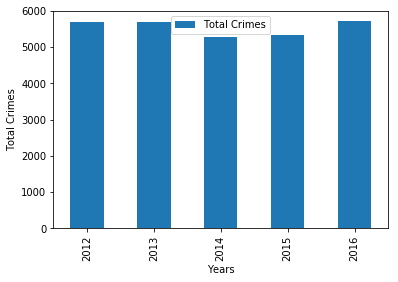

In [157]:
years = ['2012','2013','2014','2015','2016']
crime_totals.plot(kind='bar')
plt.bar(idx, crime_totals['Total Crimes'], color='r', alpha=0.5, align="edge")
plt.xlabel("Years")
plt.ylabel("Total Crimes")
plt.ylim(0,6000)
plt.show()


In [162]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2012 Crime Rate Per 10,000']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2012 Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycounty2012-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycounty2012-map.html'

In [163]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2013 Crime Rate Per 10,000']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2013 Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycounty2013-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycounty2013-map.html'

In [164]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2014 Crime Rate Per 10,000']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2014 Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycounty2014-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycounty2014-map.html'

In [165]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2015 Crime Rate Per 10,000']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2015 Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycounty2015-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycounty2015-map.html'

In [166]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2016 Crime Rate Per 10,000']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2016 Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycounty2016-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycounty2016-map.html'

In [167]:
crime_by_county_csv = './Resources/hate_crime_by_county_2012-2016_final.csv'
crime_by_county_df = pd.read_csv(crime_by_county_csv)

colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000"]
endpts = list(np.linspace(0, 40, len(colorscale) - 1))
fips = crime_by_county_df['FIPS']
values = crime_by_county_df['2012-2016 Combined Crime Rate']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colorscale,
    #county_outline={'color': 'rgb(15, 15, 15)', 'width': 0.5},
    state_outline={'color': 'rgb(200, 175, 150)','width': 1},
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='2012-2016 Combined Crime Rate by County',
    legend_title='Hate Crime Rate per 10,000'
)
fig
py.plot( fig, filename='hatecrimebycountycomb20122016-map.html' )

'file://C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Team_5\\Team_5\\hatecrimebycountycomb20122016-map.html'